In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv('Bank-full.csv')

In [3]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
##### EDA #######

In [5]:
Data.shape

(45211, 17)

In [6]:
# Datatype of each attribute

Data.dtypes.to_frame('Datatypes of attributes')

,Datatypes of attributes
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [7]:
# checking for null values

Data.isnull().any().to_frame('Null Value')

,Null Value
age,False
job,False
marital,False
education,False
default,False
balance,False
housing,False
loan,False
contact,False
day,False


In [8]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
col = Data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [11]:
ob = []
for i in col:
    if Data[i].dtype == 'object':
        ob.append(i) 

In [12]:
ob

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [13]:
Data[ob] = Data[ob].apply(pd.Categorical)
Data.dtypes.to_frame('Datatypes of attributes').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


In [14]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
# Distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
<ipython-input-16-bf71786caab0>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


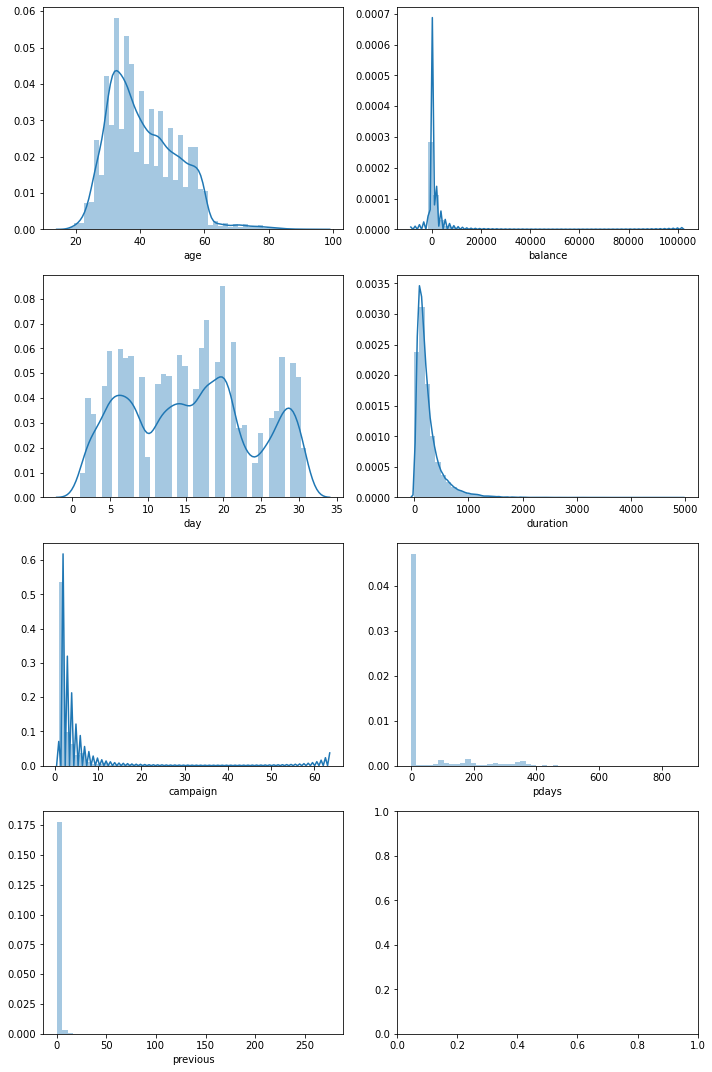

In [16]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 15)) 
axe = axe.flatten()
sns.distplot(Data['age'],ax=axe[0])
sns.distplot(Data['balance'],ax=axe[1])
sns.distplot(Data['day'],ax=axe[2])
sns.distplot(Data['duration'],ax=axe[3]) 
sns.distplot(Data['campaign'],ax=axe[4]) 
sns.distplot(Data['pdays'],ax=axe[5]) 
sns.distplot(Data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()

In [17]:
## Countplot

<ipython-input-18-4f70245db96f>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


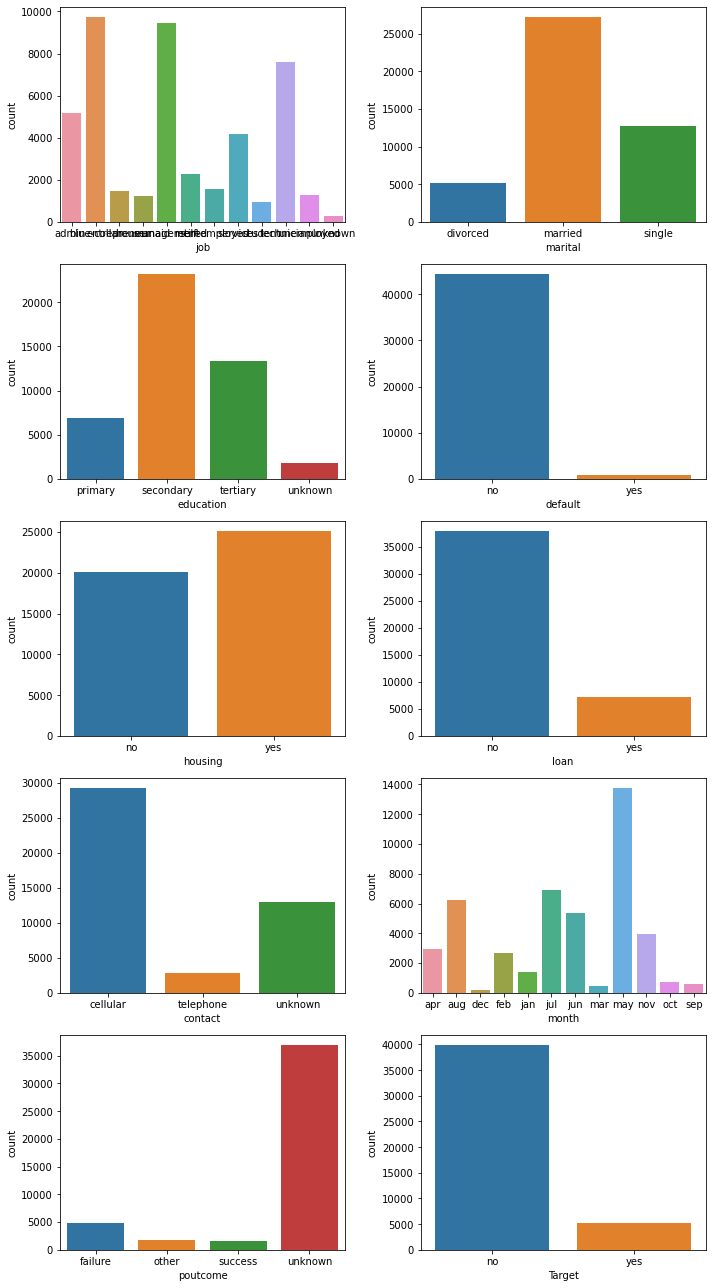

In [18]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten()

plot=sns.countplot(x=Data['job'],data=Data,ax=axe[0]) 
sns.countplot(x=Data['marital'],data=Data,ax=axe[1])
sns.countplot(x=Data['education'],data=Data,ax=axe[2]) 
sns.countplot(x=Data['default'],data=Data,ax=axe[3])  
sns.countplot(x=Data['housing'],data=Data,ax=axe[4]) 
sns.countplot(x=Data['loan'],data=Data,ax=axe[5])
sns.countplot(x=Data['contact'],data=Data,ax=axe[6]) 
sns.countplot(x=Data['month'],data=Data,ax=axe[7])  
sns.countplot(x=Data['poutcome'],data=Data,ax=axe[8])
sns.countplot(x=Data['Target'],data=Data,ax=axe[9])  
fig.tight_layout() 
fig.show()


In [19]:
# Boxplots

<ipython-input-20-c01231b6a2ac>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


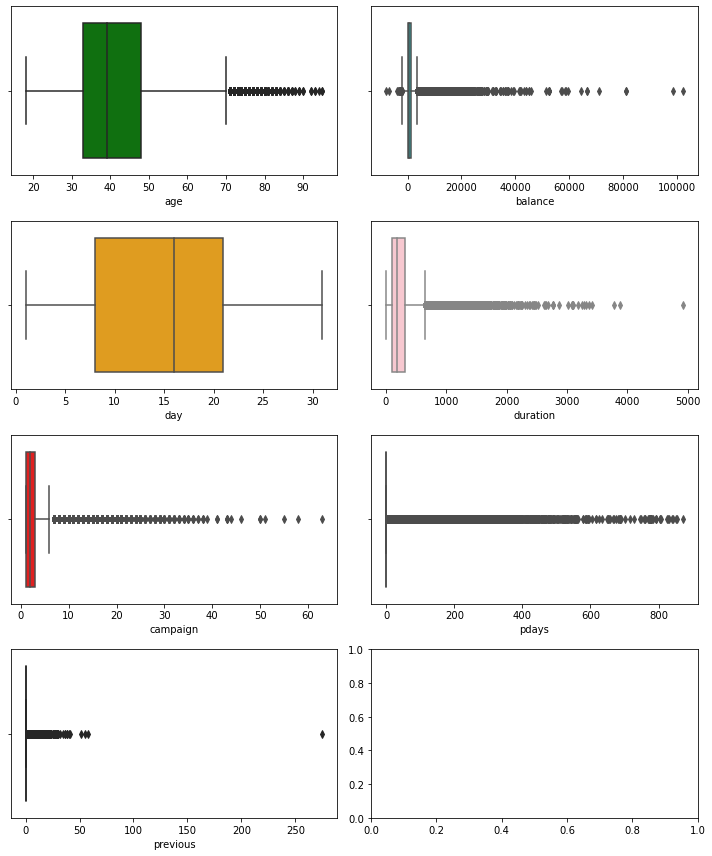

In [20]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=Data,color='green',ax=axe[0])
sns.boxplot(x='balance',data=Data,color='cyan',ax=axe[1])
sns.boxplot(x='day',data=Data,color='orange',ax=axe[2])  
sns.boxplot(x='duration',data=Data,color='pink',ax=axe[3]) 
sns.boxplot(x='campaign',data=Data,color='red',ax=axe[4])
sns.boxplot(x='pdays',data=Data,color='gold',ax=axe[5]) 
sns.boxplot(x='previous',data=Data,color='maroon',ax=axe[6]) 
fig.tight_layout() 
fig.show() 

In [21]:
### Data Preprocessing


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
df = Data.copy() 
encoder = LabelEncoder() #creating object of LabelEncoder 

df['default'] = encoder.fit_transform(df['default']).astype(int)
df['marital'] = encoder.fit_transform(df['marital']).astype(int) 
df['loan'] = encoder.fit_transform(df['loan']).astype(int) 
df['housing'] = encoder.fit_transform(df['housing']).astype(int)
df['Target'] = encoder.fit_transform(df['Target']).astype(int)
df['month'] = encoder.fit_transform(df['month']).astype(int)
df['poutcome'] = encoder.fit_transform(df['poutcome']).astype(int)
df['education'] = encoder.fit_transform(df['education']).astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [25]:
df[ob] = df[ob].apply(pd.Categorical)

In [26]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [27]:
## Handeling Outliers with mean replacement

In [28]:
change = ['balance', 'duration', 'campaign', 'pdays', 'previous']

for i in change:
    m = df[i].mean()
    
    IQR = (np.percentile(df[i],75) - np.percentile(df[i],25))
    
    df[i] = np.where(df[i] > (np.percentile(df[i], 75) + 1.5*IQR), m, df[i])
    df[i] = np.where(df[i] < (np.percentile(df[i], 25) - 1.5*IQR), m, df[i])

<ipython-input-29-f7f276bea524>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


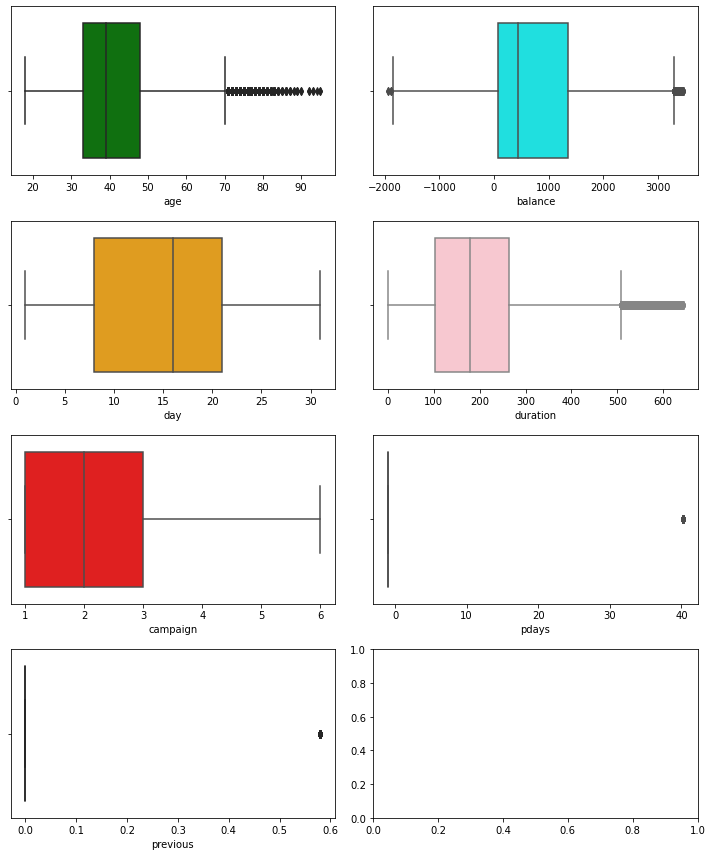

In [29]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=df,color='green',ax=axe[0])
sns.boxplot(x='balance',data=df,color='cyan',ax=axe[1])
sns.boxplot(x='day',data=df,color='orange',ax=axe[2])  
sns.boxplot(x='duration',data=df,color='pink',ax=axe[3]) 
sns.boxplot(x='campaign',data=df,color='red',ax=axe[4])
sns.boxplot(x='pdays',data=df,color='gold',ax=axe[5]) 
sns.boxplot(x='previous',data=df,color='maroon',ax=axe[6]) 
fig.tight_layout() 
fig.show() 

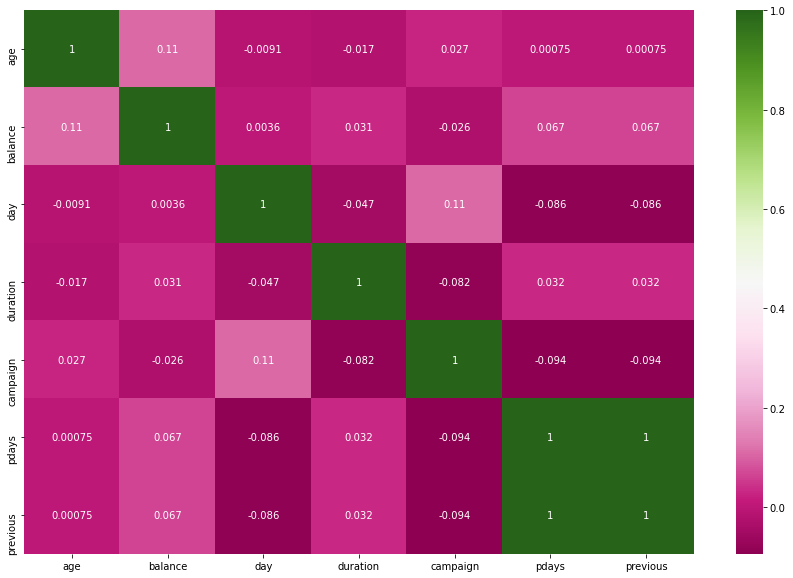

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='PiYG',annot=True)

In [31]:
#pdays previous --> Highly correlated (delete one)
#contact. job, education has  Unknown values
#day, month, duration: last contact duration, in seconds, days, months (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

df = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1) 
df.head() 

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,2143.0,1,0,1.0,0.0,3,0
1,44,2,0,29.0,1,0,1.0,0.0,3,0
2,33,1,0,2.0,1,1,1.0,0.0,3,0
3,47,1,0,1506.0,1,0,1.0,0.0,3,0
4,33,2,0,1.0,0,0,1.0,0.0,3,0


In [32]:
# Pairplot

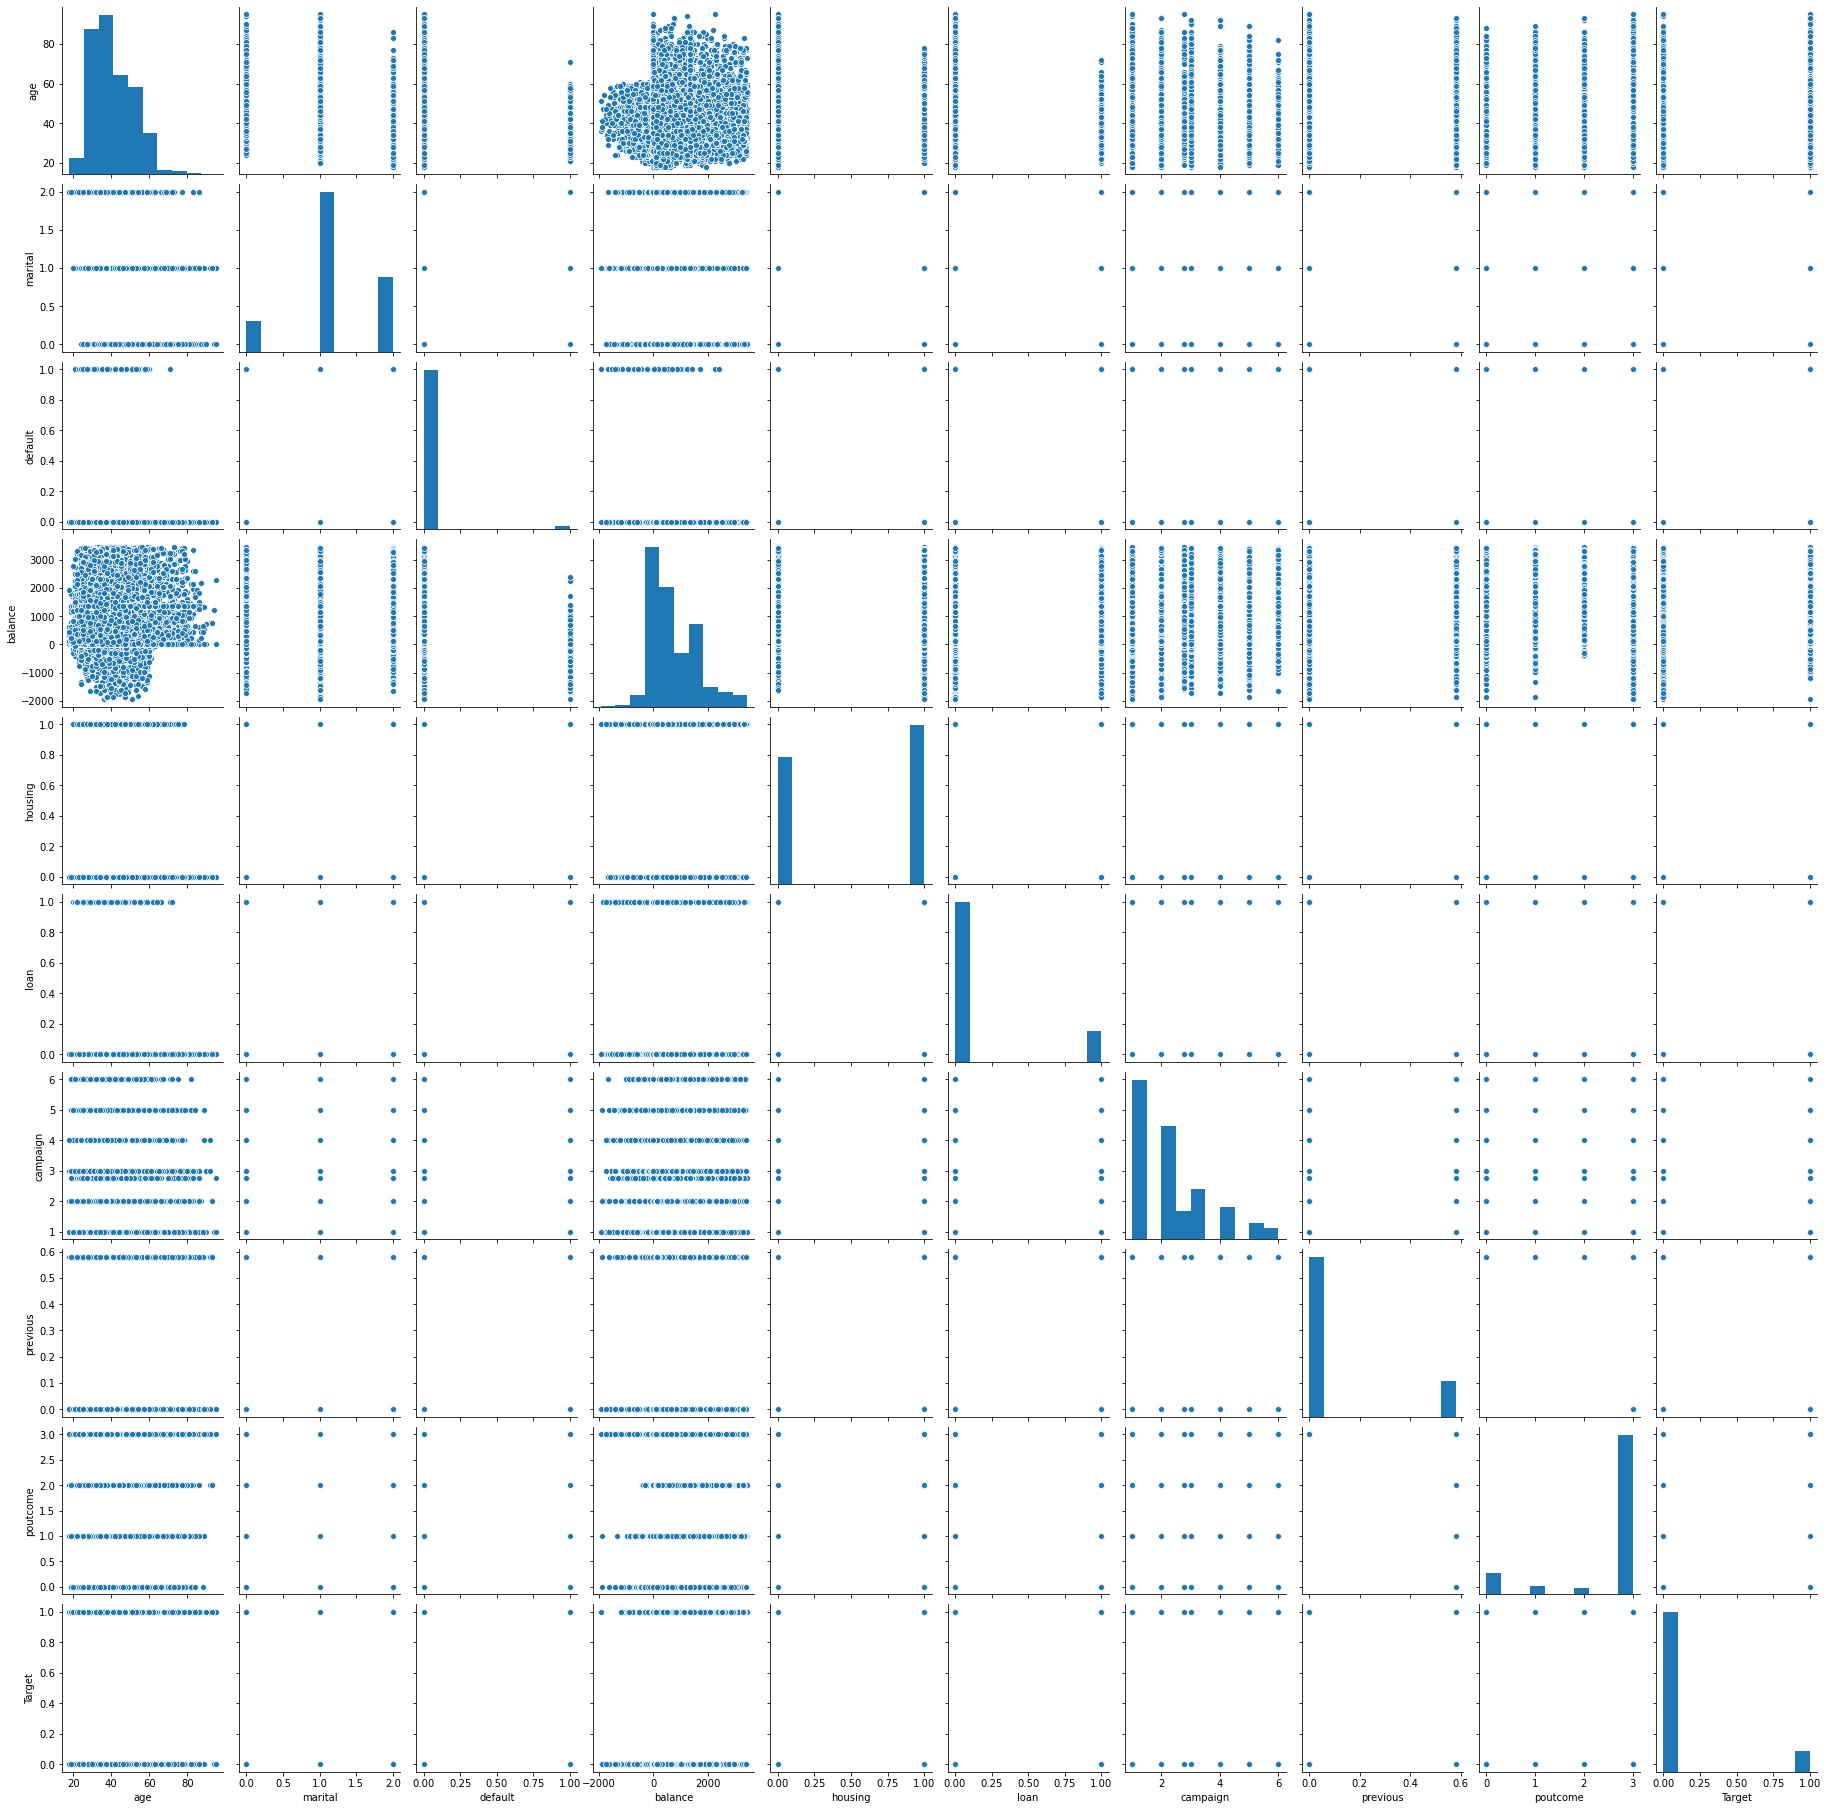

In [33]:
sns.pairplot(df)

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Target',axis=1) 
y = df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) 

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test) 

In [36]:
##############################################################################################################
############################### Logistic Regression ##########################################################

In [37]:
from sklearn.linear_model import LogisticRegression

logic_r = LogisticRegression(solver = 'liblinear') 
logic_r.fit(X_train_scaled,y_train)
y_pred = logic_r.predict(X_test_scaled) 

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[11903   110]
 [ 1310   241]]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.69      0.16      0.25      1551

    accuracy                           0.90     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.88      0.90      0.86     13564



In [39]:
#################################### Naive Bayes ##########################################################

In [40]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train_scaled, y_train)
y_pred = gauss.predict(X_test_scaled)

In [41]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[10708  1305]
 [ 1044   507]]

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.28      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564



In [42]:
###################################### KNN ##############################################################

In [44]:
from sklearn.neighbors import KNeighborsClassifier
acc_knn = []
for i in range(3, 41,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    
    acc = accuracy_score(y_test, y_pred)
    acc_knn.append(acc)
    
    print('{:-5} {}'.format(i, acc))
    

    3 0.871129460336184
    5 0.884473606605721
    7 0.8881598348569744
    9 0.8902241226776763
   11 0.8908139191978768
   13 0.892214685933353
   15 0.893394278973754
   17 0.8940578000589796
   19 0.8943526983190799
   21 0.8939103509289296
   23 0.894426422884105
   25 0.8948687702742554
   27 0.8946475965791801
   29 0.8951636685343557
   31 0.8953111176644057
   33 0.8950162194043055
   35 0.8956060159245061
   37 0.8953111176644057
   39 0.8947950457092303


In [45]:
MSE=[1 - j for j in acc_knn]
r = range(3,41,2)

In [46]:
optimal = r[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
print('optimal k is',optimal)

optimal k is 35


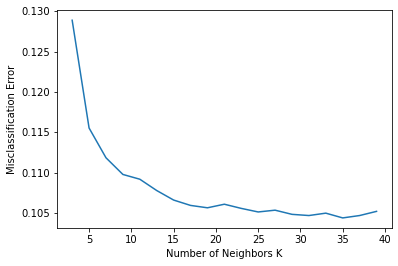

In [47]:
plt.plot(r,MSE)
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Misclassification Error') 
plt.show()

In [48]:
################################################ SVC ##############################################

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled,y_train) 
predicted_svc = svc.predict(X_test_scaled)

In [49]:
print(confusion_matrix(y_test, predicted_svc))
print()
print(classification_report(y_test, predicted_svc))

[[11870   143]
 [ 1271   280]]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



In [50]:
############### ENSEMBLE #############
############# Decision Tree ##########

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)  
predicted_DT = dTree.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predicted_DT))
print()
print(classification_report(y_test, predicted_DT))

[[10834  1179]
 [ 1150   401]]

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12013
           1       0.25      0.26      0.26      1551

    accuracy                           0.83     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.83      0.83     13564



In [52]:
############# feature importance ##########
xvar = df.drop('Target', axis=1) 
feature_cols = xvar.columns
feat_importance = dTree.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
balance,0.492149
age,0.231570
campaign,0.086480
poutcome,0.079069
marital,0.038201
previous,0.029210
loan,0.020835
housing,0.019315
default,0.003171


In [53]:
################# Pruning of Decision Tree #############

In [56]:
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=1)
dTree.fit(X_train, y_train)  
predicted_DT = dTree.predict(X_test)

In [57]:
print(confusion_matrix(y_test, predicted_DT))
print()
print(classification_report(y_test, predicted_DT))

[[11826   187]
 [ 1237   314]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



In [58]:
################### Bagging ###################

In [60]:
from sklearn.ensemble import BaggingClassifier
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train)
predicted_BAG = bagc.predict(X_test)

In [71]:
print(confusion_matrix(y_test, predicted_BAG))
print()
print(classification_report(y_test, predicted_BAG))

[[11848   165]
 [ 1251   300]]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.19      0.30      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



In [62]:
################## Adaptive Boosting #############

In [63]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) 
predicted_ADA = adab.predict(X_test)

In [72]:
print(confusion_matrix(y_test, predicted_ADA))
print()
print(classification_report(y_test, predicted_ADA))

[[11888   125]
 [ 1309   242]]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [66]:
################## Gradient Boosting ###############
from sklearn.ensemble import GradientBoostingClassifier

gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test)

In [73]:
print(confusion_matrix(y_test, predicted_GRAD))
print()
print(classification_report(y_test, predicted_GRAD))

[[11887   126]
 [ 1307   244]]

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [68]:
################## Random Forest #########################
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)#Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)
predicted_RAN = randf.predict(X_test)

In [74]:
print(confusion_matrix(y_test, predicted_RAN))
print()
print(classification_report(y_test, predicted_RAN))

[[11517   496]
 [ 1225   326]]

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.40      0.21      0.27      1551

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.85      0.87      0.86     13564

